In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import os
import mne
import random
from sklearn.metrics import classification_report
from numpy import zeros, newaxis
from scipy import signal
from scipy import fftpack
import glob
import tensorflow as tf

In [68]:
def data_loading(path):
    file_list_in = glob.glob(path)
    list_im = [file for file in file_list_in]
    list_im.sort()
    print("file_list:{}".format(list_im))
    return list_im

In [88]:
def data_load(path, input_list):
  list_im=input_list
  print(len(list_im))
  total_list = []
  for k in range(len(list_im)):
    print('loading dataset : ',k)
    data_first = pd.read_csv(path+list_im[k])
    data_first = data_first[['Fp1-LE', 'Fp2-LE', 'F7-LE', 'F3-LE', 'Fz-LE', 'F4-LE', 'F8-LE',
                                'C3-LE', 'Cz-LE', 'C4-LE',
                                'T6-LE', 'T5-LE', 'T4-LE', 'T6-LE',
                                'P3-LE', 'Pz-LE', 'P4-LE',
                                'O1-LE', 'O2-LE'
                                ]]

    if len(data_first) == 5120:
        total_list.append(data_first)
  return total_list

In [89]:
H_path = 'C:/ARK/2022_EEG/sliced_data/H_PCA/'
MDD_path = 'C:/ARK/2022_EEG/sliced_data/MDD_PCA/'
H_list = os.listdir(H_path)
MDD_list = os.listdir(MDD_path)

MDD_dataframe = data_load(MDD_path, MDD_list)
H_dataframe = data_load(H_path, H_list)
len(MDD_dataframe), len(H_dataframe)

435
loading dataset :  0
loading dataset :  1
loading dataset :  2
loading dataset :  3
loading dataset :  4
loading dataset :  5
loading dataset :  6
loading dataset :  7
loading dataset :  8
loading dataset :  9
loading dataset :  10
loading dataset :  11
loading dataset :  12
loading dataset :  13
loading dataset :  14
loading dataset :  15
loading dataset :  16
loading dataset :  17
loading dataset :  18
loading dataset :  19
loading dataset :  20
loading dataset :  21
loading dataset :  22
loading dataset :  23
loading dataset :  24
loading dataset :  25
loading dataset :  26
loading dataset :  27
loading dataset :  28
loading dataset :  29
loading dataset :  30
loading dataset :  31
loading dataset :  32
loading dataset :  33
loading dataset :  34
loading dataset :  35
loading dataset :  36
loading dataset :  37
loading dataset :  38
loading dataset :  39
loading dataset :  40
loading dataset :  41
loading dataset :  42
loading dataset :  43
loading dataset :  44
loading dataset 

(417, 403)

In [90]:
d = []
for i in H_dataframe:
    d.append(i.shape)

print(d)

[(5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (5120, 19), (51

In [91]:
y_MDD = [1 for i in range(len(MDD_dataframe))]
y_H = [0 for i in range(len(H_dataframe))]

(5120, 19)

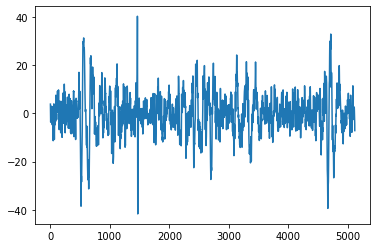

In [92]:
all_dataframe = MDD_dataframe + H_dataframe
y = y_MDD + y_H
all_dataframe[0]['Fp1-LE'].plot()
all_dataframe[0].shape

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_dataframe, y, test_size=0.2, random_state = 777)

In [98]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(656, 5120, 19)
(656,)
(164, 5120, 19)


In [95]:
transfer_model = tf.keras.models.load_model('model')

In [99]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

newmodel = Sequential()
newmodel.add(layers.Input(shape=(X_train.shape[1], X_train.shape[2])))
for i, layer in enumerate(transfer_model.layers):
    if i < 3 :
        print(layer)
        newmodel.add(layer)

newmodel.add(layers.Flatten())
newmodel.add(layers.Dense(64, activation='relu'))
newmodel.add(layers.Dense(1, activation='sigmoid'))


newmodel.build()
newmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 2560, 32)          4288      
_________________________________________________________________
dropout_2 (Dropout)          (None, 2560, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1280, 16)          3600      
_________________________________________________________________
flatten_1 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1310784   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 1,318,737
Trainable params: 1,318,737
Non-trainable params: 0
____________________________________________

In [100]:
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())


def true_pred(model, validation_generator):
    validation_generator.reset()
    predictions = model.predict_generator(validation_generator, steps=1)
    test_preds = np.rint(predictions)
    l=test_preds.shape[0]
    test_trues = validation_generator.classes
    return test_trues, test_preds


In [102]:
from tensorflow.keras import backend as K
newmodel.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy',  sensitivity, specificity])

In [103]:
history = newmodel.fit(X_train, y_train, epochs=30, batch_size=256, verbose=1, validation_split=(0.1))
history_dict = history.history


Epoch 1/30
3/3 [==============================] - 6s 300ms/step - loss: 36.5172 - accuracy: 0.5174 - sensitivity: 0.3639 - specificity: 0.6533 - val_loss: 3.0771 - val_accuracy: 0.3788 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000
Epoch 2/30
3/3 [==============================] - 0s 92ms/step - loss: 1.5344 - accuracy: 0.5083 - sensitivity: 0.4647 - specificity: 0.5398 - val_loss: 0.8636 - val_accuracy: 0.6212 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00
Epoch 3/30
3/3 [==============================] - 0s 91ms/step - loss: 1.0019 - accuracy: 0.5084 - sensiti